In [18]:
import dolfin

In [19]:
!pip install pygmsh

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip uninstall pyvista

In [21]:
import numpy as np
import pygmsh

In [22]:
lc = 100.0                       # Characteristic length of mesh
xmin, xmax = 0.0, 2000.0         # X axis boundaries
zmin, zmax = -500.0, -2500.0     # Z axis boundaries

inj_z = -1500.0                  # Depth of injection
flt_offset = 50.0                # Offset of fault
flt_thick = 10.0                 # Thickness of fault
tana = np.tan(np.deg2rad(80.0))  # Tangeant of dipping angle of fault
dist = 500.0 - 0.5 * flt_thick   # Distance from injection point (0.0, -1500.0) to left wall of fault

bnd_thick = 10.0                 # Thickness of boundary elements


In [23]:
depths = [zmin, -1300.0, -1450.0, -1550.0, -1700.0, zmax]
fault_left = [[dist + (z - inj_z) / tana, z, 0.0] for z in depths]

depths = [zmin, -1300.0 + flt_offset, -1450.0 + flt_offset, -1550.0 + flt_offset, -1700.0 + flt_offset, zmax]
fault_right = [[dist + (z - inj_z) / tana + flt_thick, z, 0.0] for z in depths]

fault_pts = fault_left + fault_right[::-1]

In [24]:
cenaq_left_pts = [
    [xmin, -1450.0, 0.0],
    [dist + (-1450.0 - inj_z) / tana, -1450.0, 0.0],
    [dist + (-1550.0 - inj_z) / tana, -1550.0, 0.0],
    [xmin, -1550.0, 0.0],
]
capro_top_left_pts = [
    [xmin, -1300.0, 0.0],
    [dist + (-1300.0 - inj_z) / tana, -1300.0, 0.0],
    [dist + (-1450.0 - inj_z) / tana, -1450.0, 0.0],
    [xmin, -1450.0, 0.0],
]
capro_bot_left_pts = [
    [xmin, -1550.0, 0.0],
    [dist + (-1550.0 - inj_z) / tana, -1550.0, 0.0],
    [dist + (-1700.0 - inj_z) / tana, -1700.0, 0.0],
    [xmin, -1700.0, 0.0],
]
uppaq_left_pts = [
    [xmin, zmin, 0.0],
    [dist + (zmin - inj_z) / tana, zmin, 0.0],
    [dist + (-1300.0 - inj_z) / tana, -1300.0, 0.0],
    [xmin, -1300.0, 0.0],
]
basaq_left_pts = [
    [xmin, -1700.0, 0.0],
    [dist + (-1700.0 - inj_z) / tana, -1700.0, 0.0],
    [dist + (zmax - inj_z) / tana, zmax, 0.0],
    [xmin, zmax, 0.0],
]


In [25]:
cenaq_right_pts = [
    [dist + (-1450.0 - inj_z + flt_offset) / tana + flt_thick, -1450.0 + flt_offset, 0.0],
    [xmax, -1450.0 + flt_offset, 0.0],
    [xmax, -1550.0 + flt_offset, 0.0],
    [dist + (-1550.0 - inj_z + flt_offset) / tana + flt_thick, -1550.0 + flt_offset, 0.0],
]
capro_top_right_pts = [
    [dist + (-1300.0 - inj_z + flt_offset) / tana + flt_thick, -1300.0 + flt_offset, 0.0],
    [xmax, -1300.0 + flt_offset, 0.0],
    [xmax, -1450.0 + flt_offset, 0.0],
    [dist + (-1450.0 - inj_z + flt_offset) / tana + flt_thick, -1450.0 + flt_offset, 0.0],
]
capro_bot_right_pts = [
    [dist + (-1550.0 - inj_z + flt_offset) / tana + flt_thick, -1550.0 + flt_offset, 0.0],
    [xmax, -1550.0 + flt_offset, 0.0],
    [xmax, -1700.0 + flt_offset, 0.0],
    [dist + (-1700.0 - inj_z + flt_offset) / tana + flt_thick, -1700.0 + flt_offset, 0.0],
]
uppaq_right_pts = [
    [dist + (zmin - inj_z) / tana + flt_thick, zmin, 0.0],
    [xmax, zmin, 0.0],
    [xmax, -1300.0 + flt_offset, 0.0],
    [dist + (-1300.0 - inj_z + flt_offset) / tana + flt_thick, -1300.0 + flt_offset, 0.0],
]
basaq_right_pts = [
    [dist + (-1700.0 - inj_z + flt_offset) / tana + flt_thick, -1700.0 + flt_offset, 0.0],
    [xmax, -1700.0 + flt_offset, 0.0],
    [xmax, zmax, 0.0],
    [dist + (zmax-inj_z) / tana + flt_thick, zmax, 0.0],
]


In [26]:
bound_right_pts = [
    [xmax, zmin, 0.0],
    [xmax + bnd_thick, zmin, 0.0],
    [xmax + bnd_thick, zmax, 0.0],
    [xmax, zmax, 0.0],
    [xmax, -1700.0 + flt_offset, 0.0],
    [xmax, -1550.0 + flt_offset, 0.0],
    [xmax, -1450.0 + flt_offset, 0.0],
    [xmax, -1300.0 + flt_offset, 0.0],
]
bound_top_pts = [
    [xmin, zmin, 0.0],
    [dist + (zmin - inj_z) / tana, zmin, 0.0],
    [dist + (zmin - inj_z) / tana + flt_thick, zmin, 0.0],
    [xmax, zmin, 0.0],
    [xmax + bnd_thick, zmin, 0.0],
    [xmax + bnd_thick, zmin + bnd_thick, 0.0],
    [dist + (zmin - inj_z + bnd_thick) / tana + flt_thick, zmin + bnd_thick, 0.0],
    [dist + (zmin - inj_z + bnd_thick) / tana, zmin + bnd_thick, 0.0],
    [xmin, zmin + bnd_thick, 0.0],
]
bound_bot_pts = [
    [xmin, zmax, 0.0],
    [dist + (zmax - inj_z) / tana, zmax, 0.0],
    [dist + (zmax - inj_z) / tana + flt_thick, zmax, 0.0],
    [xmax, zmax, 0.0],
    [xmax + bnd_thick, zmax, 0.0],
    [xmax + bnd_thick, zmax - bnd_thick, 0.0],
    [dist + (zmax - inj_z - bnd_thick) / tana + flt_thick, zmax - bnd_thick, 0.0],
    [dist + (zmax - inj_z - bnd_thick) / tana, zmax - bnd_thick, 0.0],
    [xmin, zmax - bnd_thick, 0.0],
]

In [27]:
with pygmsh.geo.Geometry() as geo:
    # Define polygons
    fault = geo.add_polygon(fault_pts, mesh_size=0.1 * lc)
    cenaq_left = geo.add_polygon(cenaq_left_pts, mesh_size=0.1 * lc)
    capro_top_left = geo.add_polygon(capro_top_left_pts, mesh_size=0.2 * lc)
    capro_bot_left = geo.add_polygon(capro_bot_left_pts, mesh_size=0.2 * lc)
    uppaq_left = geo.add_polygon(uppaq_left_pts, mesh_size=2.0 * lc)
    basaq_left = geo.add_polygon(basaq_left_pts, mesh_size=2.0 * lc)
    cenaq_right = geo.add_polygon(cenaq_right_pts, mesh_size=0.75 * lc)
    capro_top_right = geo.add_polygon(capro_top_right_pts, mesh_size=0.75 * lc)
    capro_bot_right = geo.add_polygon(capro_bot_right_pts, mesh_size=0.75 * lc)
    uppaq_right = geo.add_polygon(uppaq_right_pts, mesh_size=2.0 * lc)
    basaq_right = geo.add_polygon(basaq_right_pts, mesh_size=2.0 * lc)
    bound_right = geo.add_polygon(bound_right_pts, mesh_size=lc)
    bound_top = geo.add_polygon(bound_top_pts, mesh_size=lc)
    bound_bot = geo.add_polygon(bound_bot_pts, mesh_size=lc)

    # Define materials
    geo.add_physical([uppaq_left, uppaq_right], "UPPAQ")
    geo.add_physical([capro_top_left, capro_bot_left, capro_top_right, capro_bot_right], "CAPRO")
    geo.add_physical([cenaq_left, cenaq_right], "CENAQ")
    geo.add_physical([basaq_left, basaq_right], "BASAQ")
    geo.add_physical(fault, "FAULT")
    geo.add_physical([bound_right, bound_top, bound_bot], "BOUND")

    # Remove duplicate entities
    geo.env.removeAllDuplicates()
    mesh = geo.generate_mesh(dim=2, algorithm=6)

    # Convert cell sets to material
    cell_data = [np.empty(len(c.data), dtype=int) for c in mesh.cells]
    field_data = {}
    for i, (k, v) in enumerate(mesh.cell_sets.items()):
        if k:
            field_data[k] = np.array([i + 1, 3])
            for ii, vv in enumerate(v):
                cell_data[ii][vv] = i + 1
    mesh.cell_data["material"] = cell_data
    mesh.field_data.update(field_data)
    mesh.cell_sets = {}

    # Remove lower dimension entities
    idx = [i for i, cell in enumerate(mesh.cells) if cell.type == "triangle"]
    mesh.cells = [mesh.cells[i] for i in idx]
    mesh.cell_data = {k: [v[i] for i in idx] for k, v in mesh.cell_data.items()}

In [10]:
import pyvista
print(pyvista.global_theme.jupyter_backend)
pyvista.start_xvfb()
pyvista.set_jupyter_backend("trame")

trame


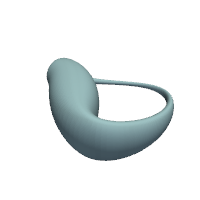

In [13]:
%matplotlib inline
p = pyvista.Plotter(window_size=(200, 200))
p.add_mesh(
pyvista.ParametricKlein()
)
if not pyvista.OFF_SCREEN:
    p.show(jupyter_backend='ipykernel')
else:
    figure = p.screenshot("fundamentals_mesh.png")